In [1]:
using Pkg
# cd("D:\\Home\\Git\\Oceananigans.jl")
# cd("C:\\Users\\Ali\\Documents\\Git\\Oceananigans.jl\\")
cd("/home/gridsan/aramadhan/Oceananigans.jl/")
Pkg.activate(".");

In [2]:
using Oceananigans

In [3]:
# using Pkg; Pkg.test("Oceananigans")

In [4]:
include("examples/deep_convection_3d_gpu.jl")

deep_convection_3d_gpu (generic function with 1 method)

In [5]:
deep_convection_3d_gpu()

[FieldWriter] Writing T to disk: ./deep_convection_3d_T_000000000000.dat
Threads per block: (16, 16)
Blocks in grid:    (6, 6, 48)
Poisson:1.329 s
model.clock.time = 20 / 20000   59.240 s
Poisson:35.283 ms
model.clock.time = 40 / 20000   35.568 ms
Poisson:33.176 ms
model.clock.time = 60 / 20000   33.374 ms
Poisson:33.611 ms
model.clock.time = 80 / 20000   33.965 ms
Poisson:37.075 ms
model.clock.time = 100 / 20000   37.274 ms
Poisson:32.220 ms
model.clock.time = 120 / 20000   32.404 ms
Poisson:32.498 ms
model.clock.time = 140 / 20000   32.829 ms
Poisson:36.411 ms
model.clock.time = 160 / 20000   36.605 ms
Poisson:32.811 ms
model.clock.time = 180 / 20000   32.988 ms
Poisson:32.494 ms
model.clock.time = 200 / 20000   32.832 ms
Poisson:35.272 ms
model.clock.time = 220 / 20000   35.461 ms
Poisson:32.688 ms
model.clock.time = 240 / 20000   32.867 ms
Poisson:32.639 ms
model.clock.time = 260 / 20000   32.992 ms
Poisson:32.612 ms
model.clock.time = 280 / 20000   32.800 ms
Poisson:33.994 ms
mode

In [10]:
fio = open("./deep_convection_3d_T_000000018000.dat", "r")
arr = zeros(Float32, 96, 96, 48)
read!(fio, arr);

In [7]:
import PyPlot

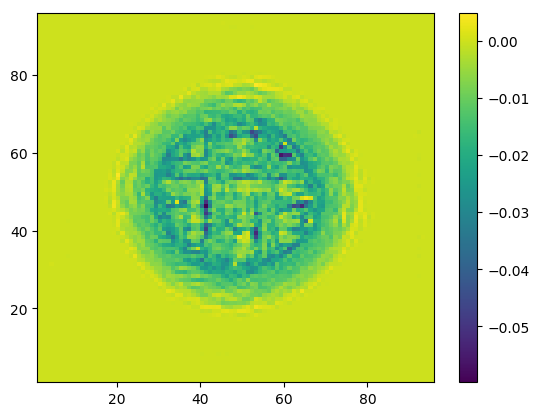

PyObject <matplotlib.colorbar.Colorbar object at 0x7f3083fdfd30>

In [11]:
PyPlot.pcolormesh(1:96, 1:96, arr[:, :, 1] .- 293.15)
PyPlot.colorbar()

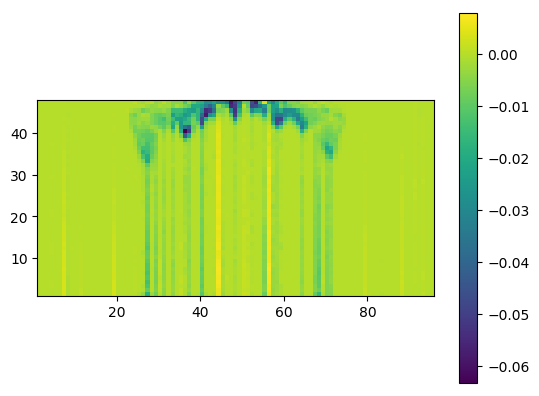

In [12]:
PyPlot.pcolormesh(1:96, 1:48, rotl90(arr[64, :, :]) .- 293.15)
PyPlot.colorbar()
PyPlot.axes()[:set_aspect]("equal")